{'담배': 518, '흡연': 406, '세금': 102, '길빵': 90, '구역': 72, '연기': 67, '금연': 63, '피': 62, '부스': 59, '충': 57, '자': 52, '꽁초': 52, '진짜': 51, '피해': 46, '애': 44, '침': 43, '비': 42, '길': 41, '놈': 40, '금지': 39, '벌금': 38, '길거리': 37, '해': 37, '왜': 36, '단속': 36, '냄새': 35, '인간': 33, '뭐': 31, '남': 30, '술': 27, '피고': 27, '돈': 27, '아이': 26, '피지': 26, '판매': 25, '나라': 25, '정부': 25, '국가': 25, '법': 24, '곳': 24, '시설': 23, '제발': 22, '옆': 22, '미세먼지': 22, '니': 22, '거': 21, '그냥': 20, '욕': 20, '눈': 19, '제대로': 19, '거리': 19, '쓰레기통': 18, '손': 18, '새끼': 18, '쓰레기': 17, '아저씨': 17, '뒤': 17, '빵': 17, '피우지': 16, '배려': 16, '차': 16, '공간': 16, '찬성': 16, '기사': 15, '서서': 15, '게': 15, '마약': 15, '진심': 15, '가면': 15, '개념': 15, '아파트': 15, '정말': 15, '분': 15, '바닥': 14, '법안': 14, '길가': 14, '신고': 14, '이상': 14, '어디': 14, '저': 14, '자체': 13, '자기': 13, '담배값': 13, '아주': 13, '거기': 13, '한국': 12, '수준': 12, '위': 12, '길빵충': 12, '보행': 12, '권리': 12, '양심': 11, '방법': 11, '해결': 11, '국민': 11, '주변': 11, '밖': 11, '자식': 11, '똥': 11, '처벌': 11, '팔지': 11, '불법':

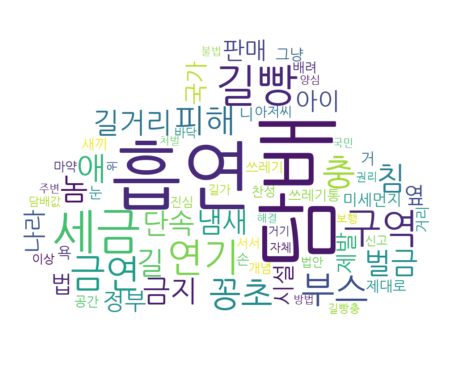

In [14]:
from wordcloud import WordCloud #워드 클라우드 작성
from konlpy.tag import Okt      #단어 전처리
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 지정
import re

import pandas as pd
import numpy as np
from PIL import Image


#텍스트 파일 불러오기

text=""
with open("./data/smoking_text.txt","r",encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        text+=line
#print(text)

#특수 문자 삭제


text = str(text)

#형태소 추출
okt=Okt()
nouns_txt = okt.nouns(text)


#단어 카운팅

count = Counter(nouns_txt)
rank_text = count.most_common()

#접속사 제거

rank_text = dict(rank_text)
count_len =10
temp_dic={}

for key, value in rank_text.items():
    if value > count_len :
        temp_dic[key] = value
rank_text = temp_dic

k_stopword = pd.read_csv("./data/korean_stopword.csv")
k_stopword = list(k_stopword["불용어"])
k_stopword.append("어요")

temp_dic ={}
for key,value in rank_text.items():
    if key not in k_stopword:
        temp_dic[key] = value

print(temp_dic)


[temp_dic.pop(key) for key in ["밖","자식","똥","아주","곳","피","자","진짜","비","해","왜","인간","뭐","남","피고","술","돈","피지","뒤","빵","피우지","차","기사","가면","아파트","분","정말","어디","저","팔지","한국","수준","게","자기"]]


#폰트 지정하기

"""
for font in fm.fontManager.ttflist:
    if "Gothic" in font.name :
        print(font.name,font.fname)
"""



img_path = "./images/cloud_image.png"
flower_mask = np.array(Image.open(img_path))

wordcloud = WordCloud(font_path = "C:\Windows\Fonts\나눔고딕.ttf",
                      background_color="white",mask=flower_mask)

wc = wordcloud.generate_from_frequencies(temp_dic)
plt.figure(figsize=(8,15))
plt.imshow(wc)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
#plt.show
plt.savefig('word_cloud.png',dpi=200)

